In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl 
import seaborn as sb

In [2]:
sb.set_style('darkgrid') 

Use the dataset framingham, the data set is used to predict the 10 year risk of coronary heart disease CHD. The following is description of each feature. 

• Sex: male or female(Nominal) <br>
• Age: Age of the patient; <br>
Behavioral<br>
• Current Smoker: whether or not the patient is a current smoker <br>
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.<br>
Medical( history)<br>
• BP Meds: whether or not the patient was on blood pressure medication <br>
• Prevalent Stroke: whether or not the patient had previously had a stroke <br>
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)<br>
• Diabetes: whether or not the patient had diabetes <br>
Medical(current)<br>
• Tot Chol: total cholesterol level <br>
• Sys BP: systolic blood pressure <br>
• Dia BP: diastolic blood pressure <br>
• BMI: Body Mass Index <br>
• Heart Rate: heart rate <br>
• Glucose: glucose level <br>
Predict variable (desired target)<br>
• 10 year risk of coronary heart disease CHD (“1”, means “Yes”, “0” means “No”)<br>

In [3]:
HD_df = pd.read_csv(filepath_or_buffer='framingham.csv')
HD_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


1. Identify what are the data types of each column. (10)

Write your answer here <br>
• Sex: (Nominal) <br>
• Age: (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) <br>
• Education: Ordinal <br>
Behavioral<br>
• Current Smoker: (Nominal)<br>
• Cigs Per Day: (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)<br>
Medical( history)<br>
• BP Meds: (Nominal)<br>
• Prevalent Stroke: (Nominal)<br>
• Prevalent Hyp: (Nominal)<br>
• Diabetes: (Nominal)<br>
Medical(current)<br>
• Tot Chol: (Continuous)<br>
• Sys BP: (Continuous)<br>
• Dia BP: (Continuous)<br>
• BMI: (Continuous)<br>
• Heart Rate: (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)<br>
• Glucose: (Continuous)<br>
Predict variable (desired target)<br>
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)<br>

In [4]:
# Print out the data types of all observations
print(HD_df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


2. Create a correlation heatmap of the data (10)

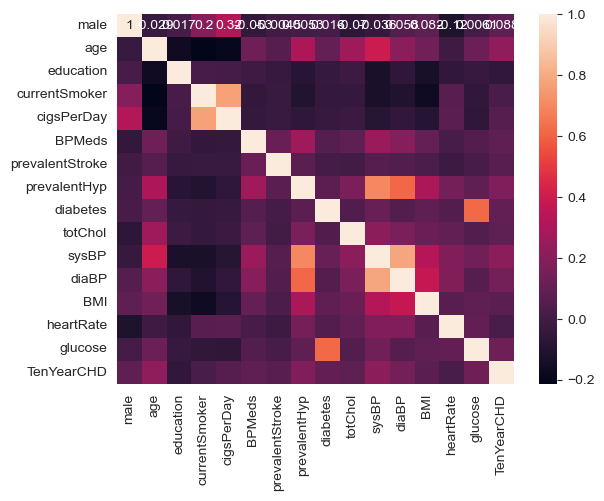

In [5]:
#Enter your code here.
sb.heatmap(HD_df.corr(), annot = True)
plt.show()

3. According to the heatmap, do you think some of the feature should not be count in the logistic regression? Which ones? (10)

Enter your answer here 

<div style="color: darkgreen;"> 
   
There are not that many features whose correlation is less than >0.8 between the pair of variables. The only features whose correlation is strong are 'cigsPerDay' and 'currentSmoker'. Since these datapoints are highly correlated (multicollinerity) these datapoints may not add new/meaningful information to the model.

4. How many empty values are there in each risk factor?(10)

In [6]:
#Enter your code here.
HD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
HD_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

5. Show how you will handle these null values for each risk factor? Why? (10)

Enter your answer here

<div style="color: darkgreen;"> 
There two prominent ways to deal with missing data. We could use imputation or dropping columns(predictors) or rows(observations). Since there are only a few null values our best approach is to use imputation method. The imputation method will replace the null values with the mean average of the entire column they are located in. 

6. Handle these null values. (10)

In [8]:
#Enter Your code here

# handling null values by using emputation method

# 1_ calculate the mean for education
mean_education = HD_df['education'].mean()
# 2_ replace missing education values with the mean education
HD_df['education'] = HD_df['education'].apply(lambda education: mean_education 
                                              if pd.isnull(education) 
                                              else education)


# handling cigsPerDay
# 1_ calculate mean
mean_cigsPerDay = HD_df['cigsPerDay'].mean()
# 2_ replace missing values
HD_df['cigsPerDay'] = HD_df['cigsPerDay'].apply(lambda cigsPerDay: mean_cigsPerDay 
                                                if pd.isnull(cigsPerDay) 
                                                else cigsPerDay)


# handling BPMeds
# 1_ calculate mean
mean_BPMeds = HD_df['BPMeds'].mean()
# 2_ replace missing values
HD_df['BPMeds'] = HD_df['BPMeds'].apply(lambda BPMeds: mean_BPMeds 
                                                if pd.isnull(BPMeds) 
                                                else BPMeds)

# handling totChol
# 1_ calculate mean
mean_totChol = HD_df['totChol'].mean()
# 2_ replace missing values
HD_df['totChol'] = HD_df['totChol'].apply(lambda totChol: mean_totChol 
                                                if pd.isnull(totChol) 
                                                else totChol)


# handling BMI
# 1_ calculate mean
mean_BMI = HD_df['BMI'].mean()
# 2_ replace missing values
HD_df['BMI'] = HD_df['BMI'].apply(lambda BMI: mean_BMI 
                                                if pd.isnull(BMI) 
                                                else BMI)

# heartRate
# 1_ calculate mean
mean_heartRate = HD_df['heartRate'].mean()
# 2_ replace missing values
HD_df['heartRate'] = HD_df['heartRate'].apply(lambda heartRate: mean_heartRate
                                                if pd.isnull(heartRate) 
                                                else heartRate)


# 'glucose' removing or emputation? 
# 1_ calculate mean
mean_glucose = HD_df['glucose'].mean()
# 2_ replace missing values
HD_df['glucose'] = HD_df['glucose'].apply(lambda glucose: mean_glucose
                                                if pd.isnull(glucose) 
                                                else glucose)

HD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


7. Show the histogram of each factors(10)

/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


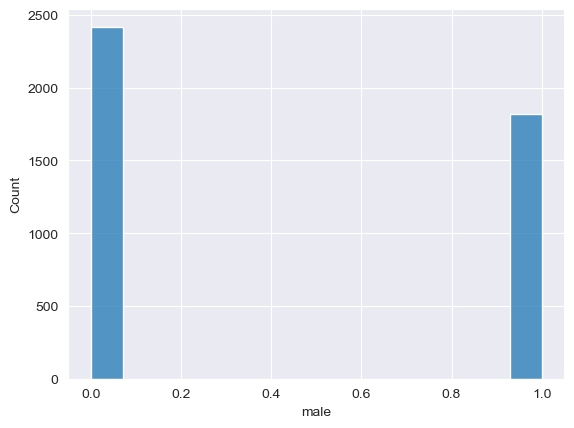

count    4238.000000
mean        0.429212
std         0.495022
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: male, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


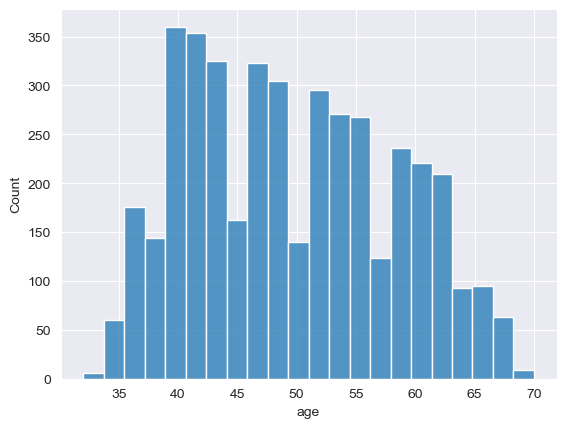

/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    4238.000000
mean       49.584946
std         8.572160
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64


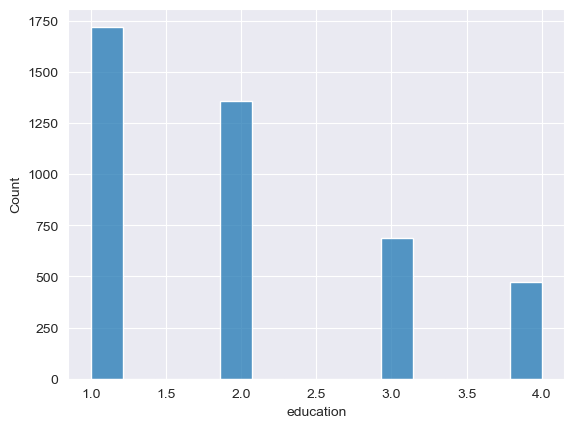

count    4238.000000
mean        1.978950
std         1.007075
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


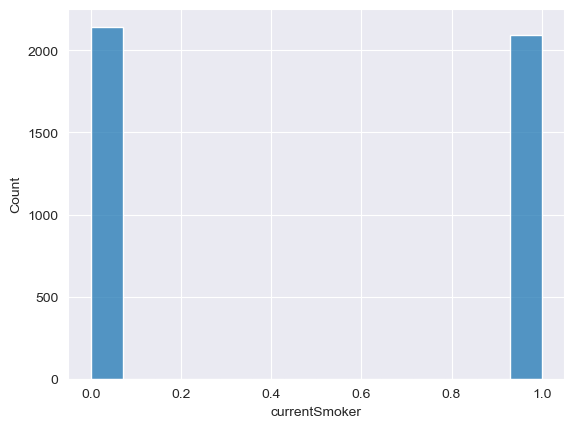

count    4238.000000
mean        0.494101
std         0.500024
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: currentSmoker, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


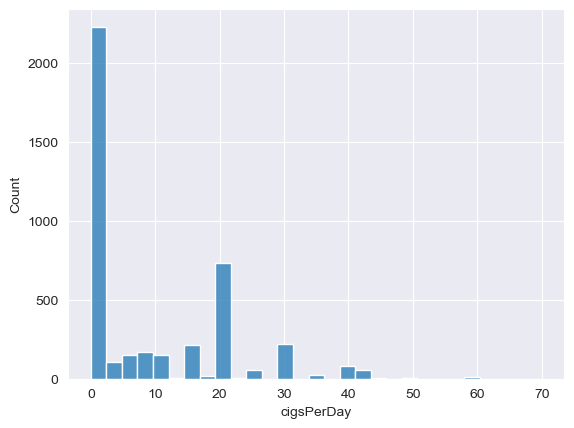

count    4238.000000
mean        9.003089
std        11.879230
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


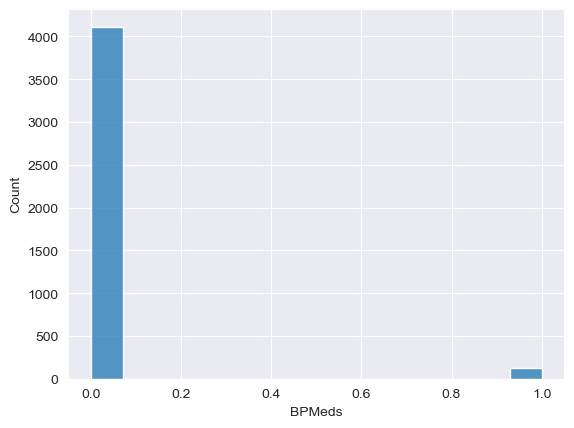

count    4238.00000
mean        0.02963
std         0.16852
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: BPMeds, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


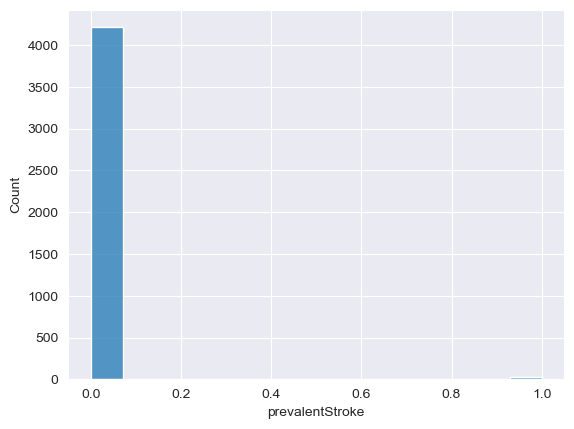

count    4238.000000
mean        0.005899
std         0.076587
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: prevalentStroke, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


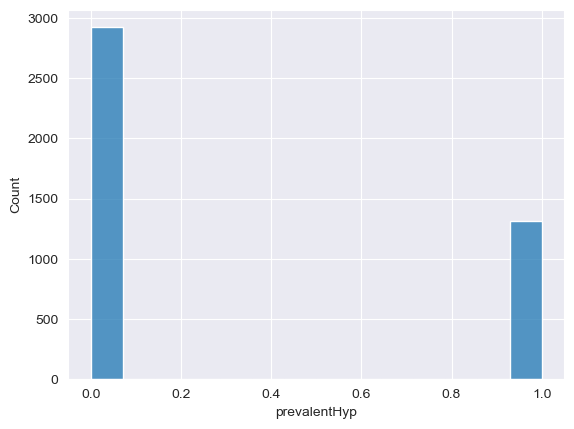

count    4238.000000
mean        0.310524
std         0.462763
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: prevalentHyp, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


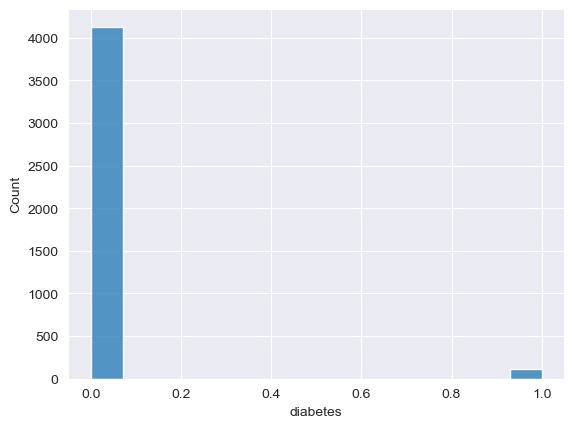

count    4238.000000
mean        0.025720
std         0.158316
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: diabetes, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


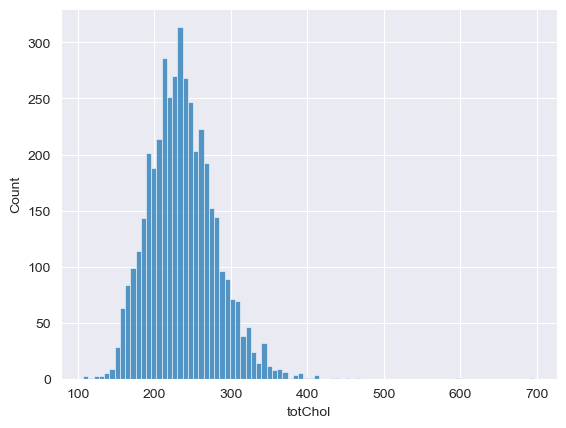

count    4238.000000
mean      236.721585
std        44.326453
min       107.000000
25%       206.000000
50%       234.000000
75%       262.000000
max       696.000000
Name: totChol, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


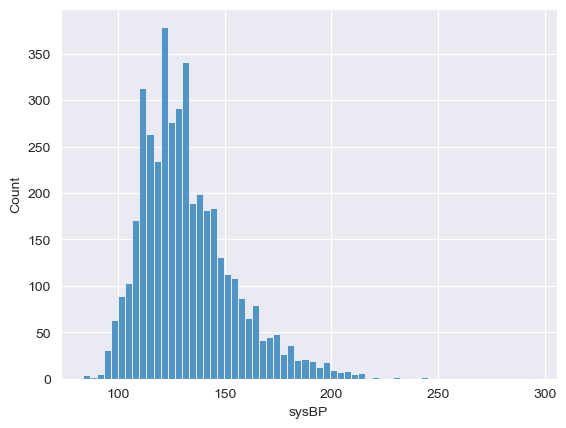

count    4238.000000
mean      132.352407
std        22.038097
min        83.500000
25%       117.000000
50%       128.000000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


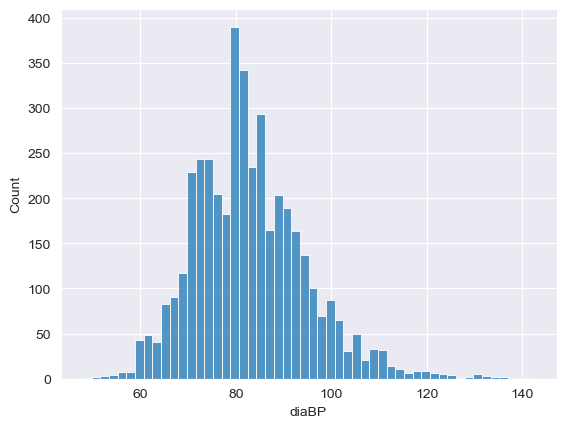

count    4238.000000
mean       82.893464
std        11.910850
min        48.000000
25%        75.000000
50%        82.000000
75%        89.875000
max       142.500000
Name: diaBP, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


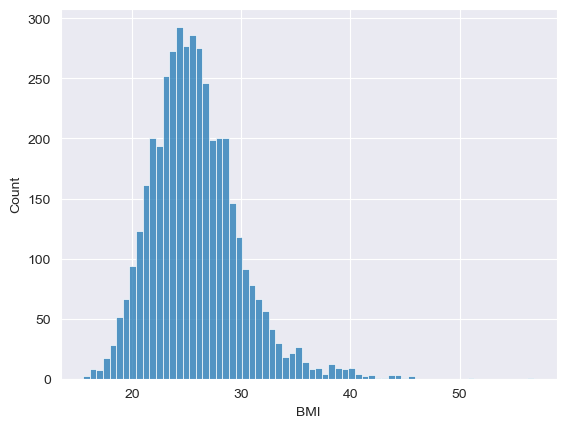

count    4238.000000
mean       25.802008
std         4.070953
min        15.540000
25%        23.080000
50%        25.410000
75%        28.037500
max        56.800000
Name: BMI, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


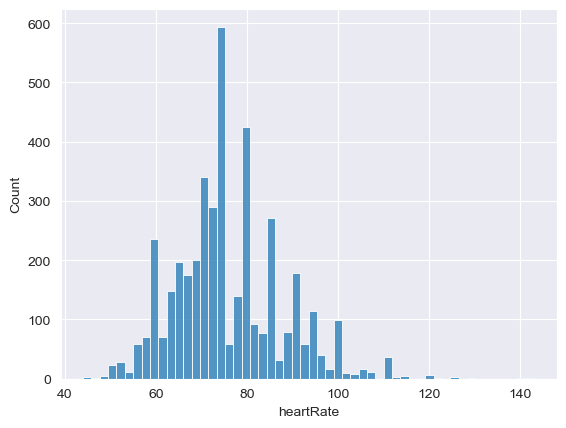

count    4238.000000
mean       75.878924
std        12.025177
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


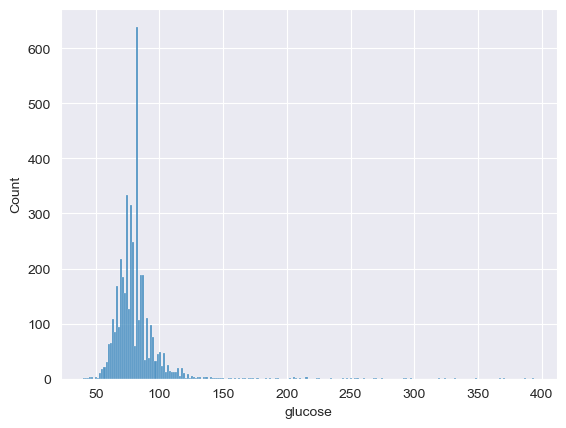

count    4238.000000
mean       81.966753
std        22.836603
min        40.000000
25%        72.000000
50%        80.000000
75%        85.000000
max       394.000000
Name: glucose, dtype: float64


/Users/jacquelinesanchez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


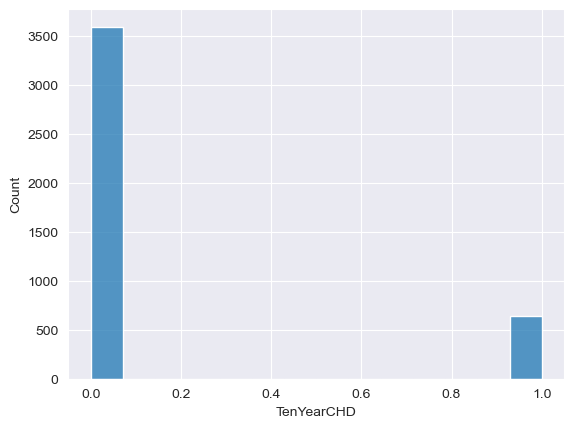

count    4238.000000
mean        0.151958
std         0.359023
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64


In [9]:
#Enter your code here
sb.histplot(HD_df['male'])
plt.show()
print(HD_df['male'].describe()) 


sb.histplot(HD_df['age'])
plt.show()
print(HD_df['age'].describe()) 


sb.histplot(HD_df['education'])
plt.show()
print(HD_df['education'].describe()) 


sb.histplot(HD_df['currentSmoker'])
plt.show()
print(HD_df['currentSmoker'].describe()) 



sb.histplot(HD_df['cigsPerDay'])
plt.show()
print(HD_df['cigsPerDay'].describe()) 


sb.histplot(HD_df['BPMeds'])
plt.show()
print(HD_df['BPMeds'].describe()) 



sb.histplot(HD_df['prevalentStroke'])
plt.show()
print(HD_df['prevalentStroke'].describe()) 



sb.histplot(HD_df['prevalentHyp'])
plt.show()
print(HD_df['prevalentHyp'].describe()) 



sb.histplot(HD_df['diabetes'])
plt.show()
print(HD_df['diabetes'].describe()) 



sb.histplot(HD_df['totChol'])
plt.show()
print(HD_df['totChol'].describe()) 



sb.histplot(HD_df['sysBP'])
plt.show()
print(HD_df['sysBP'].describe()) 



sb.histplot(HD_df['diaBP'])
plt.show()
print(HD_df['diaBP'].describe()) 



sb.histplot(HD_df['BMI'])
plt.show()
print(HD_df['BMI'].describe()) 


sb.histplot(HD_df['heartRate'])
plt.show()
print(HD_df['heartRate'].describe()) 



sb.histplot(HD_df['glucose'])
plt.show()
print(HD_df['glucose'].describe()) 


sb.histplot(HD_df['TenYearCHD'])
plt.show()
print(HD_df['TenYearCHD'].describe()) 



In [10]:
# for my observation purposes for the next three questions
# sb.pairplot(HD_df) 
# plt.show()

8. Split the data set into X_train, X_test, y_train, y_test. (10)

In [11]:
#Enter your code here
from sklearn.model_selection import train_test_split

X = HD_df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'diabetes','BPMeds', 'prevalentStroke', 'prevalentHyp', 'totChol', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD' ]] # all the other features

y = HD_df['sysBP'] # the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


9. Train the value and show the predict result of first 10 data points. (10)

In [12]:
#Enter your code here
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

# Predict the values for the test set
y_pred = lm.predict(X_test)

# Show the predicted results for the first 10 data points
predicted_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predicted_results.head(10))


      Actual   Predicted
3946   152.5  155.031032
1216   116.0  116.804662
2012   148.0  160.445271
2543   144.0  148.099315
2458   128.0  150.155152
668    112.0  109.322514
2390   137.0  158.175190
530    125.0  124.071870
1576   158.0  152.196529
3752   113.0  124.845744


10. Evaluate the model.(10) (You can use any score or method to evaluate the model, but you need to explain detail about your result)

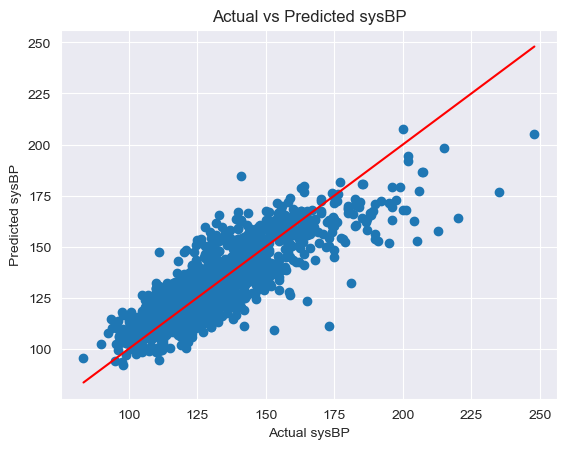

In [13]:
#Enter your code here
predictions = lm.predict(X_test)

# plt.show()


# Plot actual vs predicted values
# plt.scatter(y_test, y_pred)
plt.scatter(y_test,predictions)

plt.xlabel('Actual sysBP')
plt.ylabel('Predicted sysBP')
plt.title('Actual vs Predicted sysBP')

# Plot the regression line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')

plt.show()


In [14]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, predictions)
print('R2 Score: ', r2score)
print(f'R2 Score rounded: {r2score:.4f}')

R2 Score:  0.7063507593541538
R2 Score rounded: 0.7064


<div style="color: darkgreen;"> 
    
The model R^2 Score always equals around 0.73 ∼ 0.74 for this particular model which means that the model explains about 70% of the variability of the predictor in the model. The model has an average to good score which indicates that the predictor and the target value have a strong correlation. **Which we can imply that the model's predictions are reasonably accurate *but* there is room for improving the model which would improve the R^2 score.**

Some observations (notes to self)

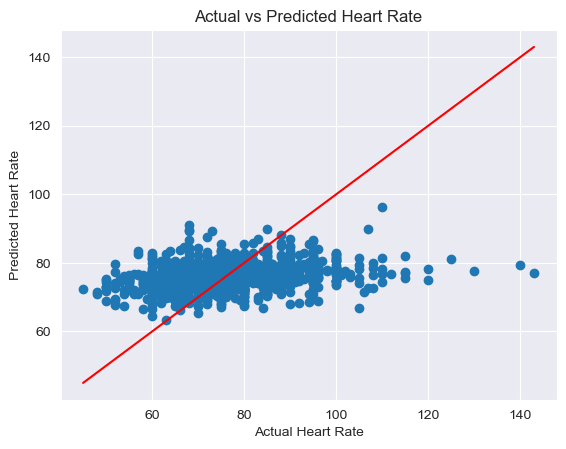

R2 Score: 0.06682505530279947
      Actual  Predicted
174     75.0  75.894704
3791    75.0  75.208072
183     80.0  77.159588
3695    65.0  77.567022
103     74.0  77.929285
1766    85.0  74.033421
2337    80.0  77.032258
36      72.0  74.477253
420     60.0  71.857551
2755    78.0  76.870612


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = HD_df[['male', 'age', 'education', 'currentSmoker','diabetes','sysBP','BPMeds', 'prevalentStroke', 'prevalentHyp', 'totChol', 'diaBP', 'BMI', 'glucose','TenYearCHD','cigsPerDay' ]] # all the other features

y = HD_df['heartRate'] # the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values for the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Heart Rate')
plt.ylabel('Predicted Heart Rate')
plt.title('Actual vs Predicted Heart Rate')


# Compute minimum and maximum values for actual and predicted heart rates
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))

# Plot the regression line
plt.plot([min_val, max_val], [min_val, max_val], linestyle='-', color='red')

plt.show()


########
# Calculate R² score
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

# Show the predicted results for the first 10 data points
predicted_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


print(predicted_results.head(10))


For this second model whose purpose is to predict Heart Rate, it is observed that there is relitively poor correlation between the predicted and actual heart rate. As seen in the R^2 score of around 0.080 which closer to 0 indicates that the model doesn't explain enough variability around its mean which is quite opposite from the previous different model. We can improve this model by feature engineering so that we can keep most relevant features thus improving the model performance. 